# Create index for prediction

The goal is to create a variable which is the average of pH, N and P, and dissolved oxygen indexes.


In [1]:
import numpy as np 
import pandas as pd 
import os
from pandas_profiling  import ProfileReport

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/Water_FINAL.csv', index_col=0)

C:\Users\beren\anaconda3\envs\TensorFlow-GPU\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,9,11,13,15,17,21,22,23,24,27,28,31,32,33,34,35,36,37,40,41,42,43,44,45,46,47,48,49,50,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\beren\anaconda3\envs\TensorFlow-GPU\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data.columns

Index(['Unnamed: 0.1', 'Agency', 'BiasPC', 'CloudCover', 'Comments', 'Cruise',
       'Database', 'Date', 'FieldActivityEventType', 'FieldActivityRemark',
       'FlowStage', 'GaugeHeight', 'GroupCode', 'HUC12', 'Lab', 'Latitude',
       'Layer', 'Longitude', 'LowerPycnocline', 'MeasureValue', 'Method',
       'ModifiedDate', 'Other Comments', 'Other Conditions', 'Parameter',
       'ParameterName_CBP', 'ParameterName_CMC', 'PrecipType', 'PrecisionPC',
       'Pressure', 'Problem', 'Program', 'Project', 'Qualifier', 'Rainfall',
       'Rainfall Within 24 Hours', 'Rainfall Within 48 Hours', 'SampleDepth',
       'SampleId', 'SampleReplicateType', 'SampleType', 'Sea State', 'Source',
       'Station', 'StationCode', 'StationName', 'Stream Flow', 'Tidal Stage',
       'TideStage', 'TierLevel', 'Time', 'TotalDepth', 'Unit',
       'UpperPycnocline', 'Water Color', 'Water Color Description',
       'Water Odor', 'Water Odor Description', 'Water Surfaces', 'WaveHeight',
       'Weather Condi

In [4]:
DO_codes = ['DO.4', 'DO.14', 'DO.1', 'DO.8', 'DO.9', 'DO.5', 'DO.2', 'DO.7', 'DO']
DO_sat_codes = ['DO_SAT_P', 'DO.15', 'DO.3', 'DO.6']
N_codes = ['NH4F', 'NH4N.1', 'NO3F', 'NO3N.3', 'NO3N.6', 'NO3N.2']
P_codes = ['PO4F', 'OP.8', 'OP.6', 'OP.3', 'OP.2']
pH_codes = ['PH', 'PH.3', 'PH.10', 'PH.6', 'PH.7', 'PH.2', 'PH.1', 'PH.9', 'PH.11']
parameters = DO_codes + DO_sat_codes + N_codes + P_codes + pH_codes

In [5]:
data_interest = data[data.Parameter.isin(parameters)]

In [6]:
len(data_interest)/len(data)

0.44408515175265634

In [7]:
data = data_interest

## General EDA

There are a lot of missing values (sparse data). Let's see if some watersheds stand out:

In [8]:
by_HUC_missing = data.groupby('HUC12').agg(lambda x: x.isnull().sum())
by_HUC_missing

,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,...,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
HUC12,,,,,,,,,,,,,,,,,,,,,
2.040303e+10,0,0,485,0,485,0,0,0,485,485.0,...,485,73,36,485,0,0,0,0,0,0
2.040303e+10,0,0,91,17,91,0,0,0,91,91.0,...,91,5,60,91,0,0,0,0,0,0
2.050101e+10,0,0,588,588,563,0,0,0,82,588.0,...,588,588,588,588,0,0,0,0,0,0
2.050101e+10,0,0,596,596,562,0,0,0,85,596.0,...,596,596,596,596,0,0,0,0,0,0
2.050102e+10,0,0,103,103,102,0,0,0,0,103.0,...,103,103,103,103,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.080208e+10,0,0,5897,53,5449,0,0,0,5897,5897.0,...,5897,5043,4971,5897,0,0,0,0,0,0
2.080208e+10,0,0,3971,14,3412,0,0,0,3971,3971.0,...,3971,3503,3456,3971,0,0,0,0,0,0
2.080208e+10,0,0,15577,240,14267,0,0,0,15577,15577.0,...,15577,14285,14173,15577,0,0,0,0,0,0


Text(0, 0.5, 'Missing values')

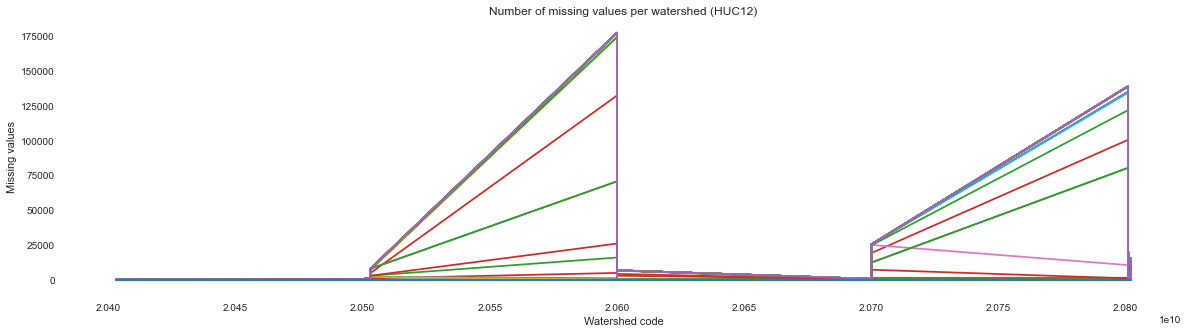

In [9]:
plt.figure(figsize=(20,5))
plt.plot(by_HUC_missing)
plt.title('Number of missing values per watershed (HUC12)')
plt.xlabel('Watershed code')
plt.ylabel('Missing values')

Text(0, 0.5, 'Missing values')

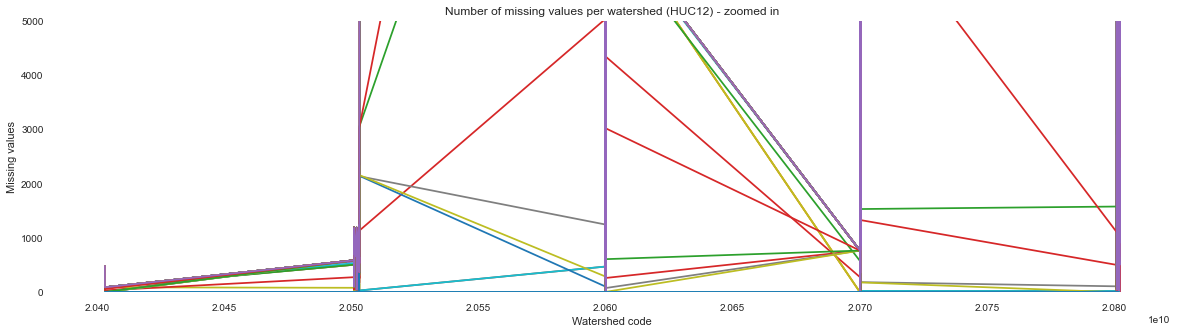

In [10]:
plt.figure(figsize=(20,5))
plt.plot(by_HUC_missing)
plt.ylim((-1, 5000))
plt.title('Number of missing values per watershed (HUC12) - zoomed in')
plt.xlabel('Watershed code')
plt.ylabel('Missing values')

Text(0, 0.5, 'Missing values')

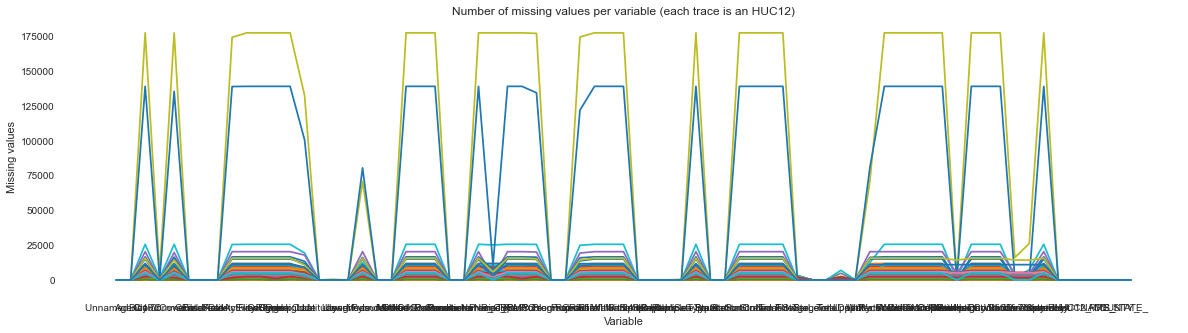

In [11]:
plt.figure(figsize=(20,5))
plt.plot(by_HUC_missing.transpose())
plt.title('Number of missing values per variable (each trace is an HUC12)')
plt.xlabel('Variable')
plt.ylabel('Missing values')

In [12]:
def make_percent_missing(df, group_var = 'HUC12_'):
    count_missing = df.groupby(group_var).agg(lambda x: x.isnull().sum()).sum(axis=1)
    count_total = df.groupby(group_var).count().sum(axis =1) + count_missing
    percent_missing = count_missing/count_total
    return percent_missing

def plot_percent_missing(percent_missing):
    plt.figure(figsize=(20,5))
    plt.plot(percent_missing)
    plt.title('Percent of missing values per watershed')
    plt.xlabel('Watershed code')
    plt.ylabel('Percent Missing values')
    plt.xticks(rotation=45)
    plt.show()
    return

In [13]:
percent_missing = make_percent_missing(data)

In [14]:
percent_missing.describe()

count    689.000000
mean       0.581747
std        0.063528
min        0.476023
25%        0.522841
50%        0.567065
75%        0.661972
max        0.661972
dtype: float64

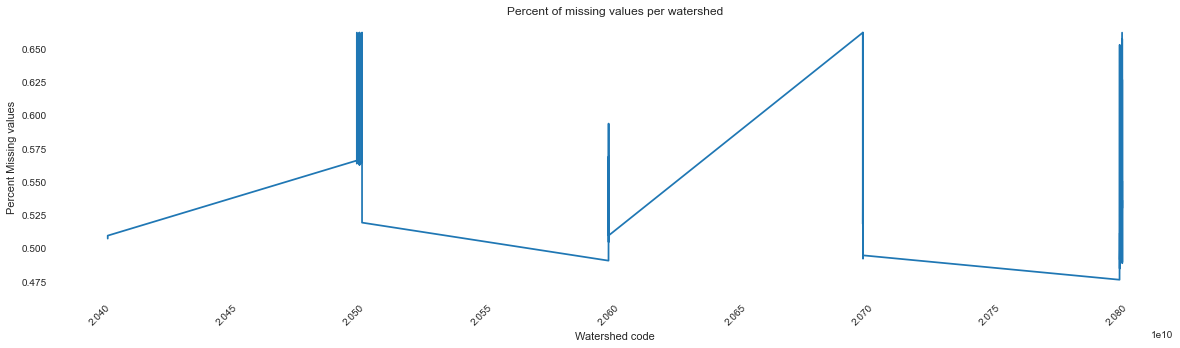

In [15]:
plot_percent_missing(percent_missing)

There is between 48 and 66% of missing values.

## Selecting two HUCs for modeling

We had decided to focus on 2017 and later data, and Virginia and Maryland, so we filter out the other states and apply the same approach. We also add HUC10 to the dataset to have more options. 

**ABOUT HUC12 CODES:** There should be a 0 as the first digit, so the codes are indeed 12 digits.

In [16]:
data.Date = pd.DatetimeIndex(data.Date)

In [17]:
#data = data[pd.DatetimeIndex(data.Date).year > 2016]

In [18]:
data.head()

,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,...,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
137,1,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,NaN,DE,POINT (-75.6177 38.6336),20801090405,Butler Mill Branch-Nanticoke River,10005,Sussex County,DE
138,2,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,NaN,DE,POINT (-75.60680000000001 38.6422),20801090404,Clear Brook-Turkey Branch,10005,Sussex County,DE
139,3,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,NaN,DE,POINT (-75.6563 38.6013),20801090405,Butler Mill Branch-Nanticoke River,10005,Sussex County,DE
140,4,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,NaN,DE,POINT (-75.6563 38.6013),20801090405,Butler Mill Branch-Nanticoke River,10005,Sussex County,DE
141,5,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,NaN,DE,POINT (-75.6563 38.6013),20801090405,Butler Mill Branch-Nanticoke River,10005,Sussex County,DE


In [19]:
data["HUC10"] = data['HUC12_'].astype(str).apply(lambda x:x[0:9])
data.HUC10

137        208010904
138        208010904
139        208010904
140        208010904
141        208010904
             ...    
2708677    208020803
2708678    208020803
2708679    208020803
2708680    208020803
2708681    208020803
Name: HUC10, Length: 1202901, dtype: object

In [20]:
# I added DC 
data_2s = data[(data.STATE_.values == 'VA') | (data.STATE_.values == 'MD') | (data.STATE_.values == 'DC')]
print('2 states number of observations:', data_2s.shape[0])
data_2s.head()

2 states number of observations: 1121247


,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,...,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,HUC10
982,942,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,MD,POINT (-75.84999999999999 38.4152),20801090504,Barren Creek-Nanticoke River,24019,Dorchester County,MD,208010905
983,943,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,MD,POINT (-75.8232 38.4828),20801090501,Chicone Creek-Nanticoke River,24019,Dorchester County,MD,208010905
984,944,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,MD,POINT (-75.8232 38.4828),20801090501,Chicone Creek-Nanticoke River,24019,Dorchester County,MD,208010905
985,945,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,MD,POINT (-75.8232 38.4828),20801090501,Chicone Creek-Nanticoke River,24019,Dorchester County,MD,208010905
986,946,NaN,NaN,NaN,NaN,NaN,CMC,2019-03-24,NaN,NaN,...,NaN,NaN,MD,POINT (-75.8232 38.4828),20801090501,Chicone Creek-Nanticoke River,24019,Dorchester County,MD,208010905


In [21]:
print('The 2 states represent {}% of the data'.format(np.round(len(data_2s)/len(data)*100),2))

The 2 states represent 93.0% of the data


In [22]:
unique, counts = np.unique(data_2s.HUC12_, return_counts=True)
len(unique)

427

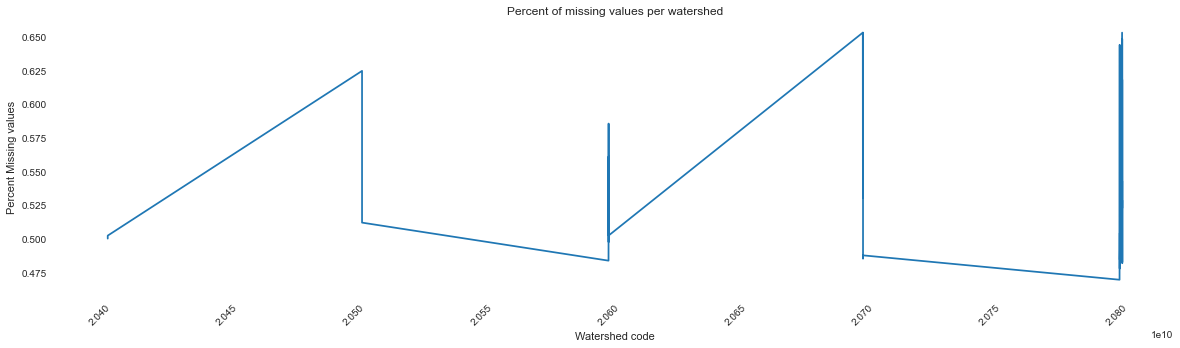

In [23]:
plot_percent_missing(make_percent_missing(data_2s))

We are looking at 360 HUC12 codes. The percentage of missing data is similar to the whole dataset's. Let's narrow down by HUC4, and focus on the Potomac river (HUC4 0207).

In [24]:
data["HUC4"] = data['HUC12_'].astype(str).apply(lambda x:x[0:3])
data.HUC4.unique()

array(['208', '206', '207', '205', '204'], dtype=object)

In [25]:
data_potom = data[data.HUC4 == '207']
print('The Potomac basin makes up {}% of the data'.format(np.round(len(data_potom)/len(data)*100),5))

The Potomac basin makes up 14.0% of the data


In [26]:
data_potom.STATE_.unique()

array(['MD', 'DC', 'VA', 'PA', 'WV'], dtype=object)

In [27]:
data_potom = data_potom[(data_potom.STATE_.values == 'VA') | (data_potom.STATE_.values == 'MD') | (data_potom.STATE_.values == 'DC')]
print('The Potomac basin in MD, DC and VA makes up {}% of the data'.format(np.round(len(data_potom)/len(data)*100),5))

The Potomac basin in MD, DC and VA makes up 13.0% of the data


We are down to 115 HUC12s or 53 HUC10s in 24 counties. If we group by HUC10 and count the missing values:

In [28]:
by_HUC_missing = data_potom.groupby('HUC10').agg(lambda x: x.isnull().sum())
by_HUC_missing

,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,...,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,HUC4
HUC10,,,,,,,,,,,,,,,,,,,,,
207000201,0,40,40,40,40,40,0,0,40,40.0,...,40,40,0,0,0,0,0,0,0,0
207000202,0,0,2690,83,2690,0,0,0,2690,2690.0,...,2680,2675,2690,0,0,0,0,0,0,0
207000203,0,0,2295,87,2295,0,0,0,1013,2295.0,...,2275,2280,2295,0,0,0,0,0,0,0
207000204,0,0,871,30,871,0,0,0,871,871.0,...,871,866,871,0,0,0,0,0,0,0
207000205,0,0,3520,96,3520,0,0,0,1886,3520.0,...,3509,3505,3520,0,0,0,0,0,0,0
207000208,0,0,1705,55,1705,0,0,0,1705,1705.0,...,1705,1695,1705,0,0,0,0,0,0,0
207000301,0,1037,2582,1284,2582,1037,0,0,1856,2582.0,...,2582,2576,1545,0,0,0,0,0,0,0
207000303,0,18,18,18,18,18,0,0,18,18.0,...,18,18,0,0,0,0,0,0,0,0
207000304,0,361,1154,656,1154,361,0,0,423,1154.0,...,1154,1154,793,0,0,0,0,0,0,0


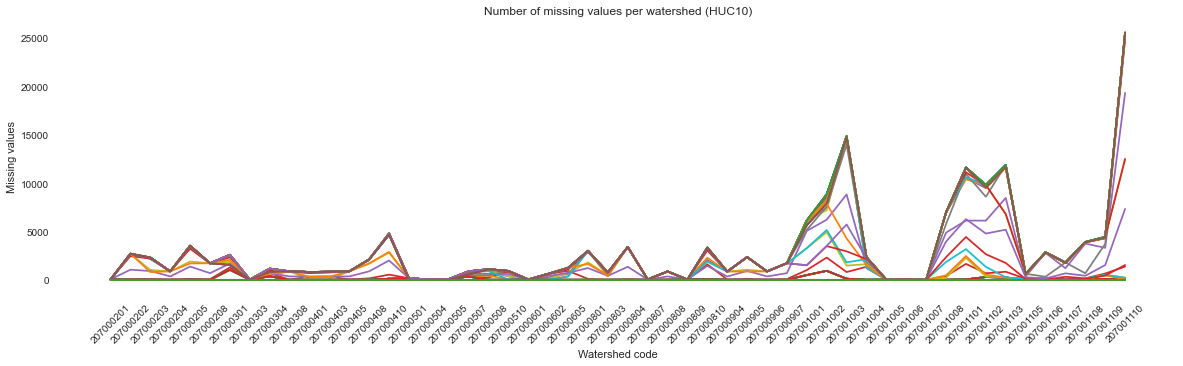

In [29]:
plt.figure(figsize=(20,5))
plt.plot(by_HUC_missing)
plt.title('Number of missing values per watershed (HUC10)')
plt.xlabel('Watershed code')
plt.ylabel('Missing values')
plt.xticks(rotation=45)
plt.show()

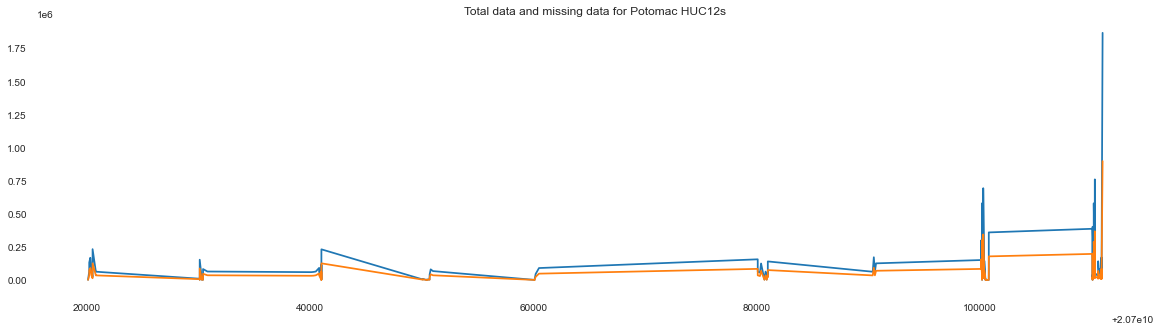

In [30]:
count_missing = data_potom.groupby('HUC12_').agg(lambda x: x.isnull().sum()).sum(axis=1)
count_total = data_potom.groupby('HUC12_').count().sum(axis =1) + count_missing
plt.figure(figsize = (20,5))
plt.plot(count_total)
plt.plot(count_missing)
plt.title('Total data and missing data for Potomac HUC12s')
plt.show()

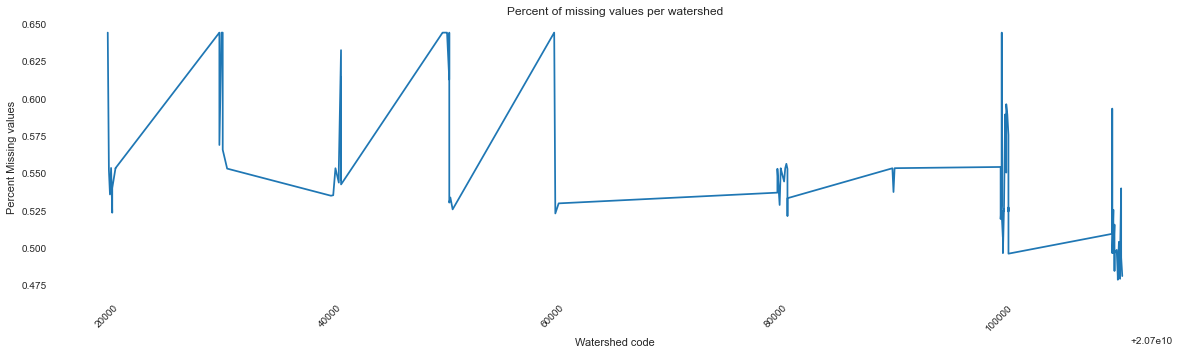

In [31]:
plot_percent_missing(make_percent_missing(data_potom))


There tends to be a higher proportion of missing data where there is less data altogether. However, some HUC12 areas might have less collection stations, making it hard to compare the absolute amount of data. Let's look at the distribution of data on the river.

In [32]:
county_keys = data_potom.COUNTY_.unique()
county_keys

array(['Charles County', "St. Mary's County", 'District of Columbia',
       'Stafford County', 'Montgomery County', "Prince George's County",
       'Washington County', 'Allegany County', 'Prince William County',
       'Fauquier County', 'King George County', 'Fairfax County',
       'Westmoreland County', 'Northumberland County', 'Augusta County',
       'Garrett County', 'Rockingham County', 'Alexandria city',
       'Waynesboro city', 'Warren County', 'Shenandoah County',
       'Frederick County', 'Loudoun County', 'Carroll County',
       'Arlington County'], dtype=object)

In [33]:
# Manually assign a level on the potomac river for these counties
# I defined 3 levels (in order, upstream to downstream): 
# Upstream, DC metro, Downstream
# source http://insulators24.org/territorial.aspx
# Counties in the Shenandoah valley are considered upstream (the river is a tributary of the Potomac 
# river upstream from DC, see https://en.wikipedia.org/wiki/Shenandoah_Valley)
county_values = ['Downstream', 'Downstream', 'DC metro', 
                 'Downstream','Upstream', 'DC metro',
                 'Upstream', 'Upstream',  'Downstream', 
                 'Upstream', 'Downstream', 'DC metro',
                 'Downstream', 'Downstream',  'Upstream', 
                 'Upstream', 'Upstream', 'DC metro',                
                 'Upstream', 'Upstream', 'Upstream', 
                 'Upstream', 'Upstream', 'Upstream', 
                 'DC metro']
counties_level = dict(zip(county_keys, county_values)) 


In [34]:
data_potom['Stream_level'] = data_potom['COUNTY_'].map(counties_level)

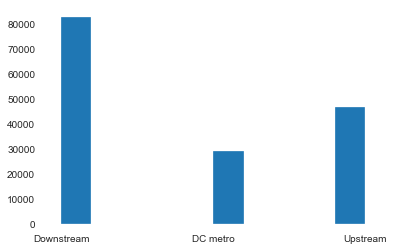

In [35]:
plt.hist(data_potom.Stream_level)
plt.show()

In [36]:
data_potom.groupby('Stream_level').HUC12_.count()

Stream_level
DC metro      29264
Downstream    82861
Upstream      46914
Name: HUC12_, dtype: int64

We have about the same amount data and HUC12s for the counties upstream and downstream from DC.

Now let's pick one county for each stream level that has lesser sparse data.

In [37]:
upstream_huc = make_percent_missing(data_potom[data_potom.Stream_level == 'Upstream'])

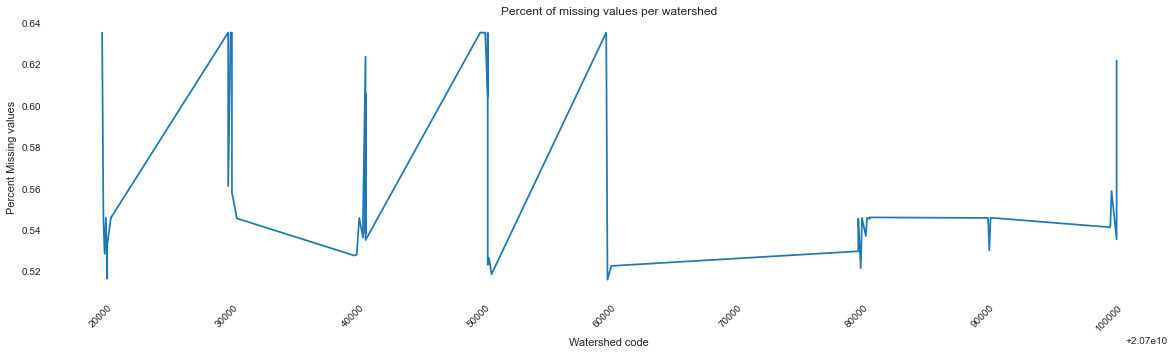

In [38]:
plot_percent_missing(upstream_huc)

In [39]:
upstream_huc.describe()

count    62.000000
mean      0.572773
std       0.046629
min       0.515682
25%       0.536232
50%       0.545625
75%       0.635135
max       0.635135
dtype: float64

In [40]:
best_10_upstream =  list(upstream_huc.sort_values().head(10).index)

In [41]:
df_best_upstream = data_potom[data_potom['HUC12_'].isin(best_10_upstream)]
df_best_upstream

,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,...,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,HUC10,HUC4,Stream_level
645391,781967,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY499,CBP,2009-02-24,R,NaN,...,NaN,POINT (-79.04470000000001 39.49364),20700020302,Lower Georges Creek,24001,Allegany County,MD,207000203,207,Upstream
645392,781971,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY499,CBP,2009-02-24,R,NaN,...,NaN,POINT (-79.04470000000001 39.49364),20700020302,Lower Georges Creek,24001,Allegany County,MD,207000203,207,Upstream
645393,781974,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY499,CBP,2009-02-24,R,NaN,...,NaN,POINT (-79.04470000000001 39.49364),20700020302,Lower Georges Creek,24001,Allegany County,MD,207000203,207,Upstream
645394,781976,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY499,CBP,2009-02-24,R,NaN,...,NaN,POINT (-79.04470000000001 39.49364),20700020302,Lower Georges Creek,24001,Allegany County,MD,207000203,207,Upstream
645395,781978,MDDNR,NaN,Scattered To Partly Cloudy (10-50%),NaN,BAY499,CBP,2009-02-24,R,NaN,...,NaN,POINT (-79.04470000000001 39.49364),20700020302,Lower Georges Creek,24001,Allegany County,MD,207000203,207,Upstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354079,4188247,VADEQ,NaN,Cloud (No Percentage),NaN,NTN019,CBP,2019-06-13,NaN,NaN,...,NaN,POINT (-77.57616 39.25458),20700080302,Catoctin Creek,51107,Loudoun County,VA,207000803,207,Upstream
2354085,4188255,VADEQ,NaN,Cloud (No Percentage),TOWEL METHOD: 100.2%,NTN015,CBP,2015-08-06,NaN,NaN,...,NaN,POINT (-77.57616 39.25458),20700080302,Catoctin Creek,51107,Loudoun County,VA,207000803,207,Upstream
2354086,4188260,VADEQ,NaN,Cloud (No Percentage),TOWEL METHOD: 100.2%,NTN015,CBP,2015-08-06,NaN,NaN,...,NaN,POINT (-77.57616 39.25458),20700080302,Catoctin Creek,51107,Loudoun County,VA,207000803,207,Upstream
2354087,4188261,VADEQ,NaN,Cloud (No Percentage),NaN,NTN015,CBP,2015-08-06,NaN,NaN,...,NaN,POINT (-77.57616 39.25458),20700080302,Catoctin Creek,51107,Loudoun County,VA,207000803,207,Upstream


In [42]:
df_best_upstream.groupby('HUC12_').Date.count()

HUC12_
20700020302    2295
20700020506     333
20700040102     807
20700040305     830
20700050704     546
20700050801    1096
20700051004     916
20700060204     617
20700060503    1231
20700080302     759
Name: Date, dtype: int64

020700020302 has data at most different dates, it's the Lower Georges Creek HUC (amongst the furthest upstream)

The second HUC12 with most dates is 020700060503 (Tumbling Run-North Fork Shenandoah River)

Third, 020700050801 is Big Run-South Fork Shenandoah River 


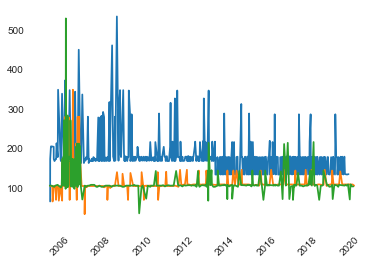

In [43]:
plt.plot(data_potom[data_potom.HUC12_ == 20700020302].groupby('Date').count().sum(axis =1))
plt.plot(data_potom[data_potom.HUC12_ == 20700060503].groupby('Date').count().sum(axis =1))
plt.plot(data_potom[data_potom.HUC12_ == 20700050801].groupby('Date').count().sum(axis =1))

plt.xticks(rotation = 45)
plt.show()

All three seem to have a similar and evenly spread amount of data. They are all good candidates.

Note: they belong to the same HUC6, but that is the highest comon division

In [44]:
downstream_huc = make_percent_missing(data_potom[data_potom.Stream_level == 'Downstream'])

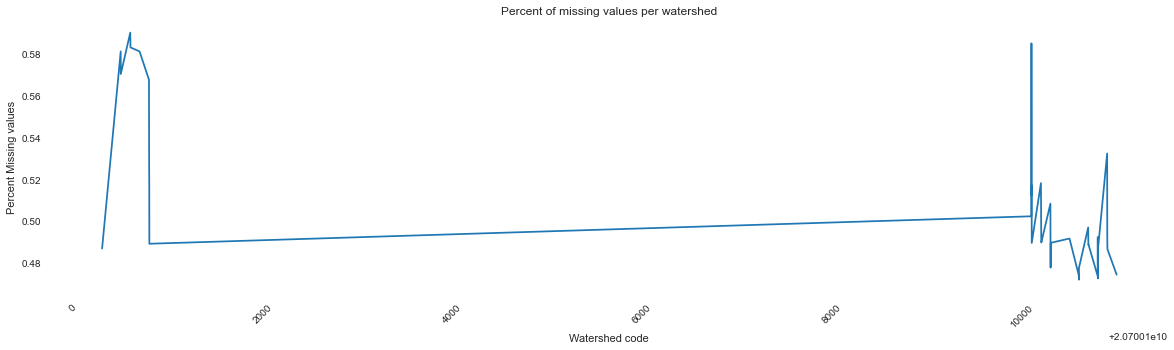

In [45]:
plot_percent_missing(downstream_huc)

In [46]:
downstream_huc.describe()

count    41.000000
mean      0.506862
std       0.036709
min       0.471917
25%       0.486486
50%       0.489696
75%       0.518111
max       0.590090
dtype: float64

In [47]:
best_10_downstream =  list(downstream_huc.sort_values().head(10).index)

In [48]:
df_best_downstream = data_potom[data_potom['HUC12_'].isin(best_10_downstream)]
df_best_downstream

,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,...,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_,HUC10,HUC4,Stream_level
7277,2104,NaN,NaN,NaN,7.9m CAW RMS,NaN,CMC,2019-04-25,NaN,NaN,...,MD,POINT (-76.851 38.23575),20700111001,Outlet Potomac River,24017,Charles County,MD,207001110,207,Downstream
7278,2105,NaN,NaN,NaN,7.9m CAW RMS,NaN,CMC,2019-04-25,NaN,NaN,...,MD,POINT (-76.851 38.23575),20700111001,Outlet Potomac River,24017,Charles County,MD,207001110,207,Downstream
7279,2106,NaN,NaN,NaN,7.9m CAW RMS,NaN,CMC,2019-04-25,NaN,NaN,...,MD,POINT (-76.851 38.23575),20700111001,Outlet Potomac River,24017,Charles County,MD,207001110,207,Downstream
7280,2107,NaN,NaN,NaN,7.9m CAW RMS,NaN,CMC,2019-04-25,NaN,NaN,...,MD,POINT (-76.851 38.23575),20700111001,Outlet Potomac River,24017,Charles County,MD,207001110,207,Downstream
7281,2108,NaN,NaN,NaN,7.9m CAW RMS,NaN,CMC,2019-04-25,NaN,NaN,...,MD,POINT (-76.851 38.23575),20700111001,Outlet Potomac River,24017,Charles County,MD,207001110,207,Downstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408400,4302725,MDDNR,NaN,Clear (0-10%),NaN,BAY749,CBP,2019-07-22,NaN,NaN,...,NaN,POINT (-76.3477 38.0215),20700111001,Outlet Potomac River,24037,St. Mary's County,MD,207001110,207,Downstream
2408401,4302726,MDDNR,NaN,Clear (0-10%),NaN,BAY749,CBP,2019-07-22,NaN,NaN,...,NaN,POINT (-76.3477 38.0215),20700111001,Outlet Potomac River,24037,St. Mary's County,MD,207001110,207,Downstream
2408402,4302727,MDDNR,NaN,Clear (0-10%),NaN,BAY749,CBP,2019-07-22,NaN,NaN,...,NaN,POINT (-76.3477 38.0215),20700111001,Outlet Potomac River,24037,St. Mary's County,MD,207001110,207,Downstream
2408403,4302728,MDDNR,NaN,Clear (0-10%),NaN,BAY749,CBP,2019-07-22,NaN,NaN,...,NaN,POINT (-76.3477 38.0215),20700111001,Outlet Potomac River,24037,St. Mary's County,MD,207001110,207,Downstream


In [49]:
df_best_downstream.Stream_level.unique()

array(['Downstream'], dtype=object)

In [50]:
df_best_downstream.groupby('HUC12_').Date.count()

HUC12_
20700110305    10401
20700110601      262
20700110602      282
20700110603      371
20700110604     1933
20700110801     1164
20700110803      553
20700110804     1160
20700110805      392
20700111001    25557
Name: Date, dtype: int64

020700111001  has the most data at different dates, it's the Potomac River Channel HUC12. It probably has multiple collection stations.

020700100805 is Gambo Creek-Potomac River HUC12, on the VA side. It flows into the Potomac river about 40 miles downstream from DC metro.

020700110604 is Popes Creek-Potomac Rive HUC12, in Virginia, flowing in the Potomac river about 15-20 miles downstream from Gambo Creek.

We would have to check lat-log to establish if the collection stations are actually on the Potomac river or on the tributaries.

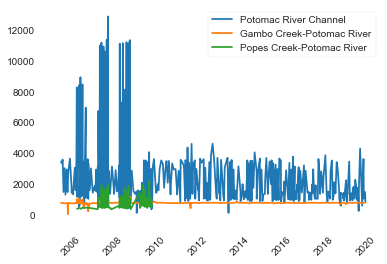

In [51]:
plt.plot(data_potom[data_potom.HUC12_ == 20700111001].groupby('Date').count().sum(axis =1))
plt.plot(data_potom[data_potom.HUC12_ == 20700100805].groupby('Date').count().sum(axis =1))
plt.plot(data_potom[data_potom.HUC12_ == 20700110604].groupby('Date').count().sum(axis =1))

plt.legend(('Potomac River Channel', 'Gambo Creek-Potomac River', 'Popes Creek-Potomac River'))
plt.xticks(rotation = 45)
plt.show()

Gambo Creek-Potomac River has a more consistent amount of data over time. The channel has a lot overall.

Popes Creek-Potomac River has nothing after 2009 (very odd??).

All 4 have more data than the upstream HUC, even at the lower collection dates. They are reasonable candidates, and we need to decide if we want to be in the metro still or more downstream. Mapping the latitude and longitude of the collection stations might be relevant at this point.